# Nihad Alakbarzade

## Research question/interests

In this project, we want to analyze NHL data from different perspectives in order to fulfill our personal interests.
 - How productive(scoring goals, making assists, having shots on goal) the NHL players are based on some factors (games played and position)?
 - How many athletes are there playing in different positions, and how their heights and weights differ?

In [2]:
import pandas as pd

mainData = pd.read_csv("../data/raw/NHL_Players_Statistics.csv", sep = ";")
mainData

,Name,Date_of_birth,SEASON_year,SEASON,TEAM,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,...,Saves,Save_Percentage,Shutouts,Position,Height,Weight,Body_mass_index,Place_of_birth,Age,Experience
0,Aaron Downey,1974-08-27,2000,'99-'00,BOS,1,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",26,1
1,Aaron Downey,1974-08-27,2001,'00-'01,CHI,3,0.0,0.0,0.0,-1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",27,2
2,Aaron Downey,1974-08-27,2002,'01-'02,CHI,36,1.0,0.0,1.0,-2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",28,3
3,Aaron Downey,1974-08-27,2003,'02-'03,DAL,43,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",29,4
4,Aaron Downey,1974-08-27,2004,'03-'04,DAL,37,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,1972-05-05,2001,'00-'01,LA,73,38.0,51.0,89.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,29,8
27315,Zigmund Palffy,1972-05-05,2002,'01-'02,LA,63,32.0,27.0,59.0,5.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,30,9
27316,Zigmund Palffy,1972-05-05,2003,'02-'03,LA,76,37.0,48.0,85.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,31,10
27317,Zigmund Palffy,1972-05-05,2004,'03-'04,LA,35,16.0,25.0,41.0,18.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,32,11


# **MILESTONE 3**

## **Task 1**
### **Data Analysis**
---

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

print("Number of rows and columns, respectively:", mainData.shape)
print("Columns in the dataset which need to be cleaned later:", mainData.columns)

Number of rows and columns, respectively: (27319, 40)
Columns in the dataset which need to be cleaned later: Index(['Name', 'Date_of_birth', 'SEASON_year', 'SEASON', 'TEAM',
       'Games_Played', 'Goals', 'Assists', 'Points', 'PlusMinus_Ratings',
       'Penalty_Minutes', 'Shots_on_Goal', 'Shooting_Percentage',
       'PowerPlay_Goals', 'PowerPlay_Assists', 'Short_Goals', 'Short_Assists',
       'Game_Winning_Goals', 'Game_Tying_Goals', 'Time_on_Ice_per_Game',
       'Production', 'Number', 'Games_Started', 'Wins', 'Losses', 'Ties',
       'Overtime_Losses', 'Goals_Against', 'Goals_Against_Average',
       'Shots_Against', 'Saves', 'Save_Percentage', 'Shutouts', 'Position',
       'Height', 'Weight', 'Body_mass_index', 'Place_of_birth', 'Age',
       'Experience'],
      dtype='object')


In [4]:
mainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27319 entries, 0 to 27318
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   27319 non-null  object 
 1   Date_of_birth          27319 non-null  object 
 2   SEASON_year            27319 non-null  int64  
 3   SEASON                 27319 non-null  object 
 4   TEAM                   27319 non-null  object 
 5   Games_Played           27319 non-null  int64  
 6   Goals                  24802 non-null  float64
 7   Assists                24802 non-null  float64
 8   Points                 24802 non-null  float64
 9   PlusMinus_Ratings      24802 non-null  float64
 10  Penalty_Minutes        24802 non-null  float64
 11  Shots_on_Goal          24802 non-null  float64
 12  Shooting_Percentage    24802 non-null  float64
 13  PowerPlay_Goals        24802 non-null  float64
 14  PowerPlay_Assists      24802 non-null  float64
 15  Sh

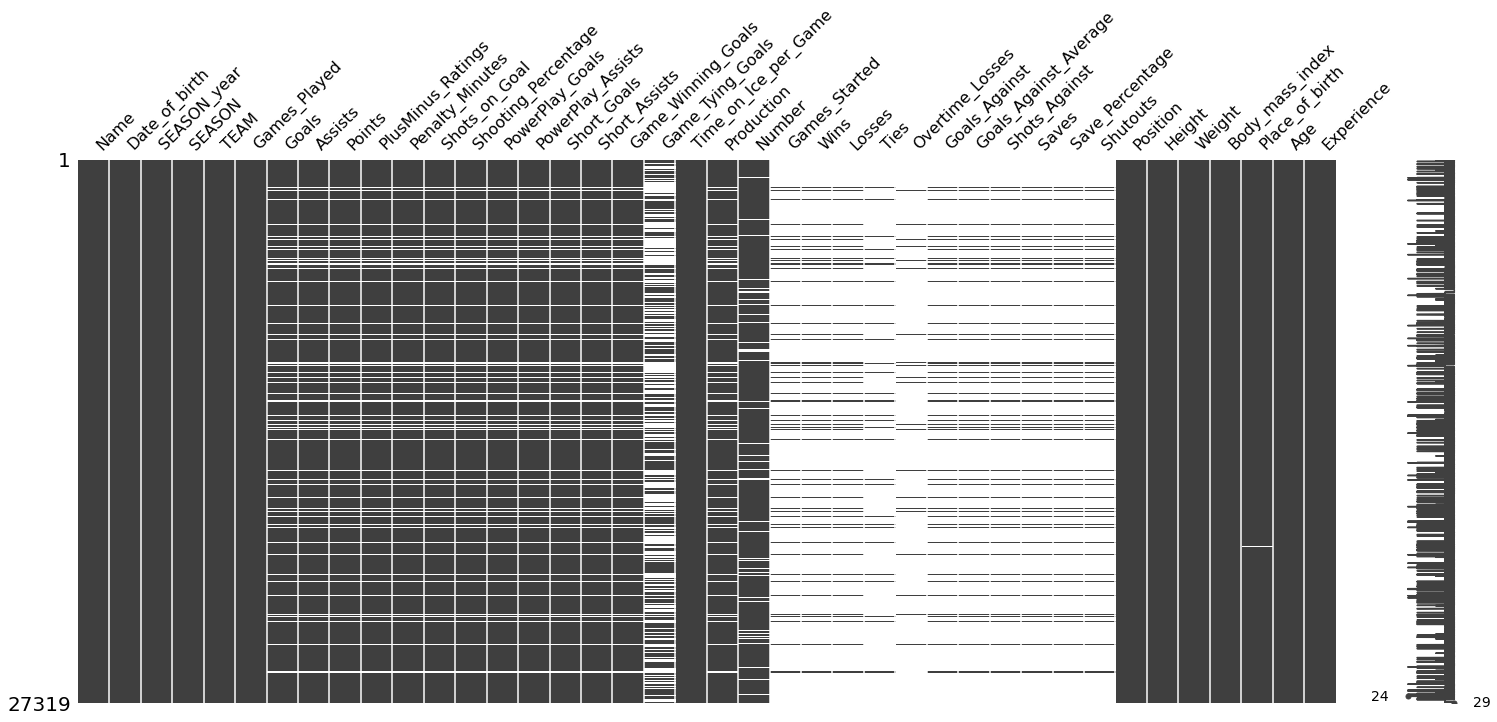

In [5]:
if mainData.isnull().any(axis=None):
    missingno.matrix(mainData)
    plt.show()

There are a plethora of missing values in column which are dropped in the project functions in order to get processed data.

In [6]:
mainData.describe(include=['float64', 'int64']).T

,count,mean,std,min,25%,50%,75%,max
SEASON_year,27319.0,2003.060837,8.958513,1976.0,1996.000,2003.000,2010.000,2020.00
Games_Played,27319.0,44.236246,28.161504,1.0,16.000,47.000,72.000,84.00
Goals,24802.0,7.752681,9.835740,0.0,1.000,4.000,11.000,92.00
Assists,24802.0,13.113297,14.395609,0.0,2.000,8.000,20.000,163.00
Points,24802.0,20.865979,23.063433,0.0,3.000,13.000,32.000,215.00
PlusMinus_Ratings,24802.0,-0.094509,10.255430,-61.0,-5.000,-1.000,4.000,98.00
Penalty_Minutes,24802.0,40.008669,45.200093,0.0,8.000,27.000,54.000,408.00
Shots_on_Goal,24802.0,76.981211,71.567047,0.0,17.000,58.000,119.000,528.00
Shooting_Percentage,24802.0,8.095117,7.809799,0.0,2.600,7.400,12.000,100.00
PowerPlay_Goals,24802.0,2.034876,3.521412,0.0,0.000,0.000,3.000,31.00


In [7]:
mainData.describe(include='object').T

,count,unique,top,freq
Name,27319,3340,Mark Recchi,28
Date_of_birth,27319,2854,1980-09-26,50
SEASON,27319,44,'03-'04,1116
TEAM,27319,35,NYI,1098
Time_on_Ice_per_Game,27319,2470,0:00,9221
Production,24802,5929,0:00,11053
Position,27319,6,Defence,8709
Place_of_birth,27298,1343,"Toronto, Ontario",955


## **Task 2-3**
### Load in unprocessed file
Loading process of unprocessed and processed data

In [8]:
import project_functions3 as pf

In [9]:
csvFile = '../data/raw/NHL_Players_Statistics.csv'
first = pf.unprocessed(csvFile)
first

,Name,Date_of_birth,SEASON_year,SEASON,TEAM,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,...,Saves,Save_Percentage,Shutouts,Position,Height,Weight,Body_mass_index,Place_of_birth,Age,Experience
0,Aaron Downey,1974-08-27,2000,'99-'00,BOS,1,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",26,1
1,Aaron Downey,1974-08-27,2001,'00-'01,CHI,3,0.0,0.0,0.0,-1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",27,2
2,Aaron Downey,1974-08-27,2002,'01-'02,CHI,36,1.0,0.0,1.0,-2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",28,3
3,Aaron Downey,1974-08-27,2003,'02-'03,DAL,43,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",29,4
4,Aaron Downey,1974-08-27,2004,'03-'04,DAL,37,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,1972-05-05,2001,'00-'01,LA,73,38.0,51.0,89.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,29,8
27315,Zigmund Palffy,1972-05-05,2002,'01-'02,LA,63,32.0,27.0,59.0,5.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,30,9
27316,Zigmund Palffy,1972-05-05,2003,'02-'03,LA,76,37.0,48.0,85.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,31,10
27317,Zigmund Palffy,1972-05-05,2004,'03-'04,LA,35,16.0,25.0,41.0,18.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,32,11


### Load in processed file

In [10]:
second = pf.load_and_process(csvFile)
second

,Name,Position,Height,Weight,Body_mass_index,Games_Played,Goals,Assists,Shots_on_Goal
0,Aaron Downey,Right_wing,185,98,28.6,243,8.0,10.0,85.0
1,Aaron Gagnon,Centre,180,85,26.2,38,3.0,2.0,28.0
2,Aaron Gavey,Centre,188,86,24.3,197,23.0,32.0,224.0
3,Aaron MacKenzie,Defence,183,88,26.3,5,0.0,0.0,3.0
4,Aaron Miller,Defence,190,94,26.0,475,13.0,64.0,353.0
...,...,...,...,...,...,...,...,...,...
2417,Zdeno Chara,Defence,206,113,26.6,1469,203.0,444.0,3205.0
2418,Zdeno Ciger,Left_wing,185,91,26.6,56,12.0,13.0,92.0
2419,Zenith Komarniski,Defence,183,91,27.2,21,1.0,1.0,22.0
2420,Zenon Konopka,Centre,183,97,29.0,346,12.0,18.0,200.0


## **Task 4**

### **Data Analysis:**

In [11]:
print("Number of rows and columns, respectively:", second.shape)
print("Number of rows decreased from 27319 to 2422 finally.")

Number of rows and columns, respectively: (2422, 9)
Number of rows decreased from 27319 to 2422 finally.


In [12]:
print(second.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2422 entries, 0 to 2421
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2422 non-null   object 
 1   Position         2422 non-null   object 
 2   Height           2422 non-null   int64  
 3   Weight           2422 non-null   int64  
 4   Body_mass_index  2422 non-null   float64
 5   Games_Played     2422 non-null   int64  
 6   Goals            2422 non-null   float64
 7   Assists          2422 non-null   float64
 8   Shots_on_Goal    2422 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 170.4+ KB
None


In [13]:
second.describe(include = ['float64', 'int64']).T

,count,mean,std,min,25%,50%,75%,max
Height,2422.0,185.601569,5.272207,163.0,183.0,185.0,188.0,206.0
Weight,2422.0,92.299339,6.928918,50.0,88.0,92.0,97.0,120.0
Body_mass_index,2422.0,26.781338,1.391126,14.2,25.8,26.8,27.7,31.4
Games_Played,2422.0,297.382742,312.199678,1.0,29.0,176.0,507.0,1568.0
Goals,2422.0,45.854666,77.158781,0.0,1.0,11.0,54.0,706.0
Assists,2422.0,78.622626,120.296153,0.0,3.0,23.0,106.0,1060.0
Shots_on_Goal,2422.0,490.029727,684.055800,0.0,24.0,182.0,709.0,5545.0


In [14]:
second.describe(include = 'object').T

,count,unique,top,freq
Name,2422,2416,Alexandre Picard,2
Position,2422,4,Defence,845


#### Analysis 
- Maximum, minimum, mean height of the NHL player is 206.0 cm, 163.0 cm, 185.6 cm.
- Maximum, minimum, mean weight of the NHL player is 120.0 kg, 50.0 kg, 92.3 kg.
- Maximum, minimum, mean goals scored by players are 706, 0, 45.
- Maximum, minimum, mean assists made by players are 1060, 0, 78.
- Maximum, minimum, mean shots on goal had by players are 5545, 0, 490.
- The most frequent position is defence.  

We have the cleaned and restructured dataset needed above. Now, we need to analyze relationships between variables.   
Below, we can see the **Correlation Matrix** which helps us to visualize correlation between all variables.

---

<AxesSubplot:>

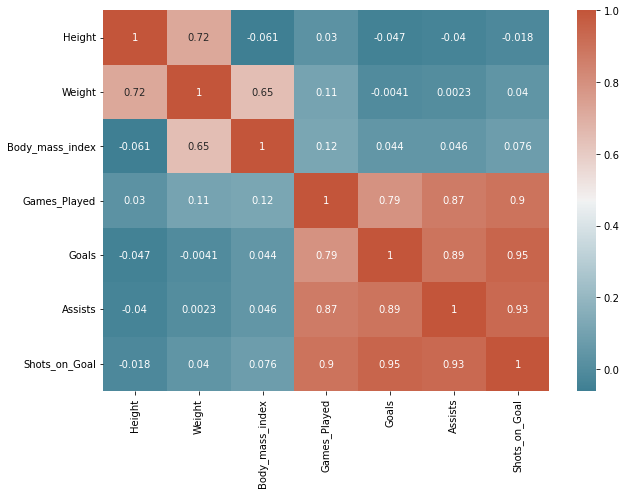

In [15]:
corr = second.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

---
#### Graph analysis

Above, we can see there are **strong positive correlations** between these variables below:
 - Goals vs. games played
 - Assists vs. games played
 - Shots on goal vs. games played  
 

Now, I will use three **scatter plots** to visualize the correlation between them. 
 
---

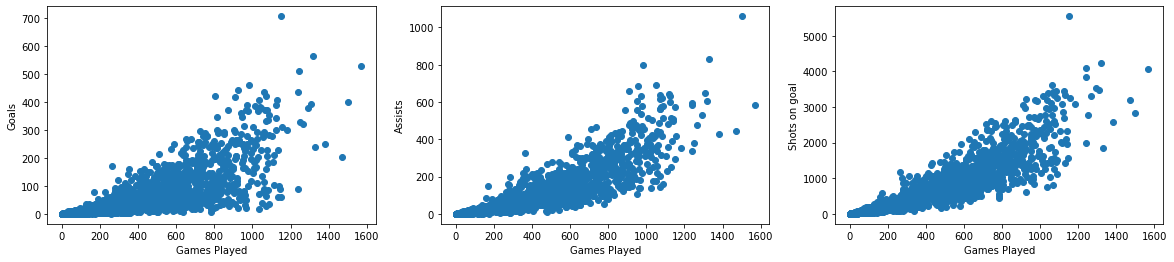

In [16]:
figure, axis = plt.subplots(1, 3, figsize = (20, 4))
X = second.Games_Played
Y1 = second.Goals
Y2 = second.Assists
Y3 = second.Shots_on_Goal
axis[0].set_ylabel('Goals')
axis[1].set_ylabel('Assists')
axis[2].set_ylabel('Shots on goal')
for i in range(3):
    axis[i].set_xlabel('Games Played')
axis[0].scatter(X, Y1)
axis[1].scatter(X, Y2)
axis[2].scatter(X, Y3)

---

#### Graph Analysis

- Above, we can see **positive correlations** on all the three scatter plots. In each, the games played has an increasing effect on goals, assists, and shots on goal.  
  Of course, it was expected. However, there is other thing to point out, we can also see that there are players who have more games played had less goals, less assists, and less shots on goal than the players who played less games, and vice versa. It means that there are more productive players who contribute to the team more or vice versa.

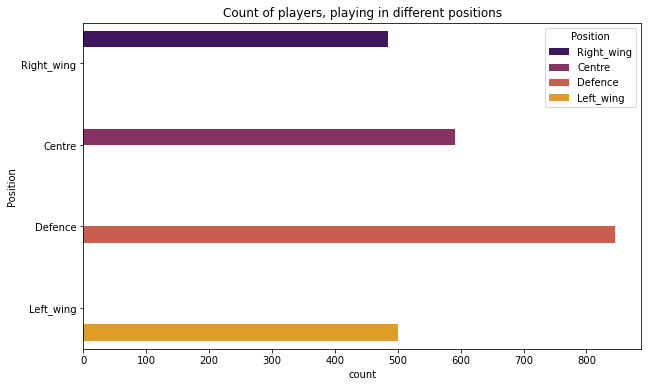

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=second,y='Position',palette='inferno',hue='Position')
plt.title('Count of players, playing in different positions')
plt.show()

#### Graph Analysis
- There are four types of players as showed in the figure above. 
- There are almost the same number of players in the position of Right Wing and Left Wing which is approximately 500.
- The number of players in the Centre position is approximately 600. 
- The number of players in the Defence position is approximately 850, and this is the most frequent player position in our data.

<AxesSubplot:xlabel='Shots_on_Goal', ylabel='Position'>

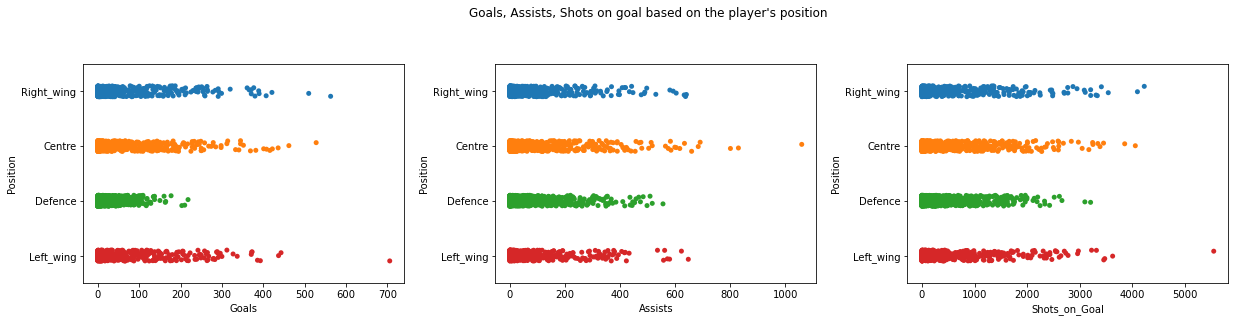

In [18]:
figure, ax = plt.subplots(1, 3, figsize = (18, 5))
figure.tight_layout(pad = 6)
figure.suptitle("Goals, Assists, Shots on goal based on the player's position")
sns.stripplot(data = second , x = 'Goals',y = 'Position', ax = ax[0])
sns.stripplot(data = second , x = 'Assists',y = 'Position', ax = ax[1])
sns.stripplot(data = second, x = 'Shots_on_Goal',y = 'Position', ax = ax[2])

#### Graph Analysis
- In the first graph:    
Left wing player is the most goal scorer about 700.  
The least goal scorer players are in the defence position as they are staying far from the opponent's goal cage mostly.
- In the second graph:  
Players in the centre position make more assists(maximum about 1075) than other positions as they are considered as play-makers.  
Players in other positions are almost making the same number of assists.
- In the third graph:  
Left wing player has the most number of shots on goal which is about 5800. And the least is players in the defence position, which we said before that they are playing at the back near their goal cage. 
  

<AxesSubplot:title={'center':'BoxPlot of Height by Position'}, xlabel='Height', ylabel='Position'>

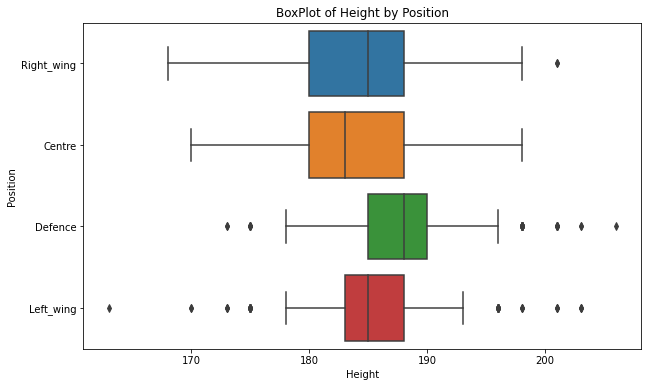

In [19]:
fig, axis = plt.subplots(figsize=(10,6))
axis = sns.boxplot(data=second, x='Height', y="Position")
axis.set_title('BoxPlot of Height by Position')
axis.set_xlabel("Height")
axis.set_ylabel("Position")
axis

#### Graph Analysis
- Right and left wing players' median height is almost the same. 
- Centre players' median height is the least, and defence players' median height is the largest. 
- However, all players' median height is between 180 cm and 190 cm. 
- There are some outliers in all positions except centre. And, left wing has a huge difference between its maximum and minimum (considering outliers).  

<AxesSubplot:title={'center':'BoxPlot of Weight by Position'}, xlabel='Weight', ylabel='Position'>

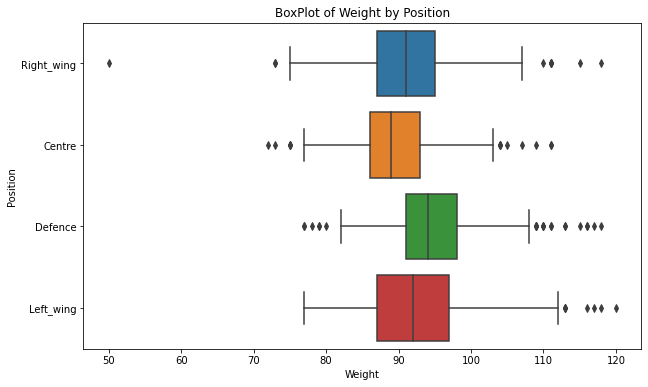

In [20]:
fig, axis = plt.subplots(figsize=(10,6))
axis = sns.boxplot(data = second, x='Weight', y="Position")
axis.set_title('BoxPlot of Weight by Position')
axis.set_xlabel("Weight")
axis.set_ylabel("Position")
axis

#### Graph Analysis
- There is no huge difference between their medians. Their median is between 90 kg and 95 kg.
- Additionally, there is a considerable difference between maximum and minimum for right wing players. 
- There are more outliers than the height boxplot for different positions.

### Summary
There are several factors which affect the player's performance and productivity. As the number of games played increased, all the goals, assists, shots on goal increased. However, there are some players who did not do well, nevertheless the numbers of games played increased. Additionally, there are 4 different position of players in which defence players took the most part of it, then centre, and left-right wing almost equally. Player's position is also in the list of influencing factors which assits us to visualizate player's productivity better. At last, among these players their weight and height also differed. However, their weight and height were almost in the same range for the players playing in different positions. 

In [23]:
second.to_csv("analysis3_processed.csv", index = False)